# 5 Minute Tutorial Series

## Publishing Content to Enterprise and ArcGIS Online

### Setup the Environment

In [11]:
import os
import requests
import tempfile
from arcgis.gis import GIS

In [2]:
gis = GIS(profile='your_online_profile')

### What is a Hosted Service?

<img src="./img/cloud.jpg"/>

    You can publish your maps and data as hosted layers to ArcGIS Online. When you do this, ArcGIS Online takes care of 
    hosting your layers and the data that populates them. Hence, these are called hosted layers.

### Type of Services


- hosted feature layers
- hosted feature layer views
- hosted WFS layers
- hosted tile layers
- hosted vector tile layers
- hosted scene layers
- hosted imagery layers

### Download Data and Add it to ArcGIS Online

This demo will use the **free** data provided by GeoFabrik.  They provide a subset of the Open Street Map dataset to download as `shapefiles`.  You can find out more about them [here](http://download.geofabrik.de/europe.html).

In [12]:
with tempfile.TemporaryDirectory() as tmpdir:
    url = "http://download.geofabrik.de/europe/iceland-latest-free.shp.zip"
    fp = os.path.join(tmpdir, 'iceland_osm_data.zip')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(fp, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
    ## Add the content!
    item = gis.content.add(item_properties={
            'title' : "Iceland Open Street Map Data",
            'type' : "Shapefile",
            'tags' : "OSM, Iceland"
        }, data=fp)


**What is going on here?**

The code is leveraging multiple libraries and ideas.  

1. `tempfile` - creates a temporary directory where files within that directory will automatically be erased
2. `requests` - downloads the information to local disk in small bits because the file is large.
3. `gis.content.add` - places the data onto our enterprise system

### Publishing the Item

- like the `add` method, `publish` take in publish parameters
    + customize the symbology, service name, and much more....
- Data can be published as tile or feature layers

In [ ]:
hfl_item = item.publish(publish_parameters={"name":"ICELAND_OSM",
                                            "description" : "OpenStreetMap Iceland Data, March 2020"})
hfl_item

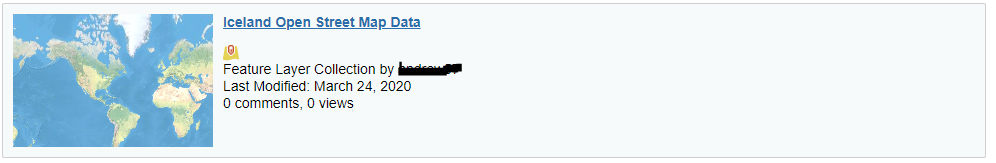

In [24]:
m = gis.map('Iceland')
m.add_layer(hfl_item)
m

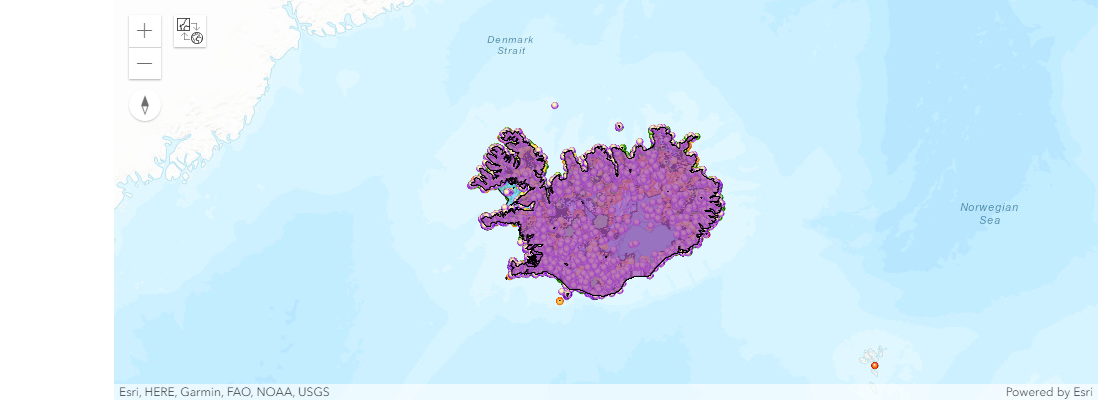

In [23]:
hfl_item.layers

[<FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/ICELAND_OSM/FeatureServer/0">,
 <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/ICELAND_OSM/FeatureServer/1">,
 <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/ICELAND_OSM/FeatureServer/2">,
 <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/ICELAND_OSM/FeatureServer/3">,
 <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/ICELAND_OSM/FeatureServer/4">,
 <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/ICELAND_OSM/FeatureServer/5">,
 <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/ICELAND_OSM/FeatureServer/6">,
 <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/ICELAND_OSM/FeatureServer/7">,
 <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy